In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

# insert path to the directory that your csv files are in. 
data_path = '.'
csv_filename1 = 'obesity_dataset.csv'
csv_filename2 = 'cancer_dataset.csv'

# save the excel file as csv first, not sure why cannot read an excel file directly
df = pd.read_csv(os.path.join(data_path, csv_filename1))
df2 = pd.read_csv(os.path.join(data_path, csv_filename2))

In [11]:
# calculating tpr and fpr from dataset
def cal_tpr_fpr(csv_file_path):
    df = pd.read_csv(csv_file_path)
    val_max = df.iloc[:,1].max()*0.9
    val_min = df.iloc[:,1].min()*1.1

    steps = np.linspace(val_max, val_min, 20)

    tpr = []
    fpr = []

    for step in steps:
        tp, tn, fp, fn = 0, 0, 0, 0
        for ind, row in df.iterrows():
            if row[1] > step:
                if row[2] == 1:
                    tp += 1
                else: 
                    fn += 1
            else:
                if row[2] == 0:
                    tn += 1
                else: 
                    fp += 1
        tpr.append (tp/(tp + fn))
        fpr.append (fp/(fp + tn))
    return tpr, fpr

In [12]:
# calling the calc function
tpr_tumor, fpr_tumor = cal_tpr_fpr('cancer_dataset.csv')
tpr_weight, fpr_weight = cal_tpr_fpr('obesity_dataset.csv')

Text(0.5, 1.0, 'Weight Best Fit Line')

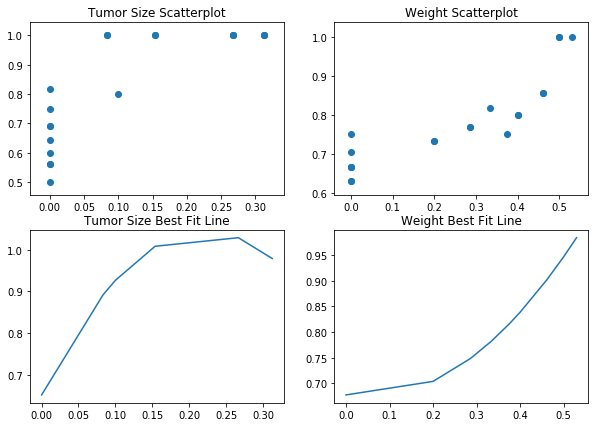

In [13]:
# plotting line of best fit for a scatterplot
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=2, figsize=(10,7))
ax1[0].scatter(fpr_tumor, tpr_tumor)
ax1[1].scatter(fpr_weight, tpr_weight)
ax1[0].set_title('Tumor Size Scatterplot')
ax1[1].set_title('Weight Scatterplot')
ax2[0].plot(np.unique(fpr_tumor), np.poly1d(np.polyfit(fpr_tumor, tpr_tumor, 2))(np.unique(fpr_tumor)))
ax2[1].plot(np.unique(fpr_weight), np.poly1d(np.polyfit(fpr_weight, tpr_weight, 2))(np.unique(fpr_weight)))
ax2[0].set_title('Tumor Size Best Fit Line')
ax2[1].set_title('Weight Best Fit Line')